In [14]:
from utils.preprocessing import preprocessingV1
from utils.modelization import saveModel,loadModel,submitModel
from sklearn.feature_selection import mutual_info_classif, chi2

import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()


df_hipo = pd.read_csv("datasets/train_radiomics_hipocamp.csv")
df_control = pd.read_csv("datasets/train_radiomics_occipital_CONTROL.csv")

hipo = preprocessingV1(df_hipo,False)
X_train, y_train = preprocessingV1(pd.read_csv("datasets/train_radiomics_hipocamp.csv"))
y_train_e = label_encoder.fit_transform(y_train)


control = preprocessingV1(df_control,False)
X_control, y_control = preprocessingV1(pd.read_csv("datasets/train_radiomics_occipital_CONTROL.csv"))
y_control_e = label_encoder.fit_transform(y_control)




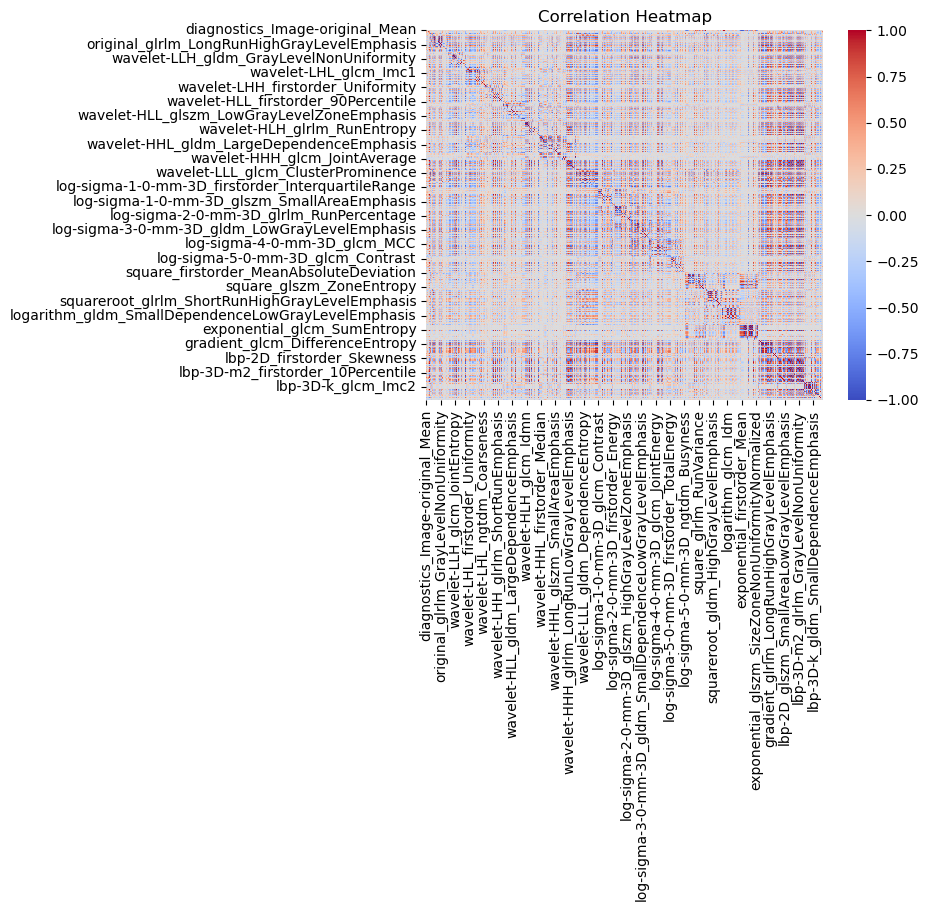

In [11]:
# Compute correlation matrix
hipo['Transition'] = label_encoder.fit_transform(hipo['Transition'])
corr_matrix = hipo.corr(numeric_only=True)

# Plot heatmap for features with high correlation with the target
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, center=0)
plt.title("Correlation Heatmap")
plt.show()


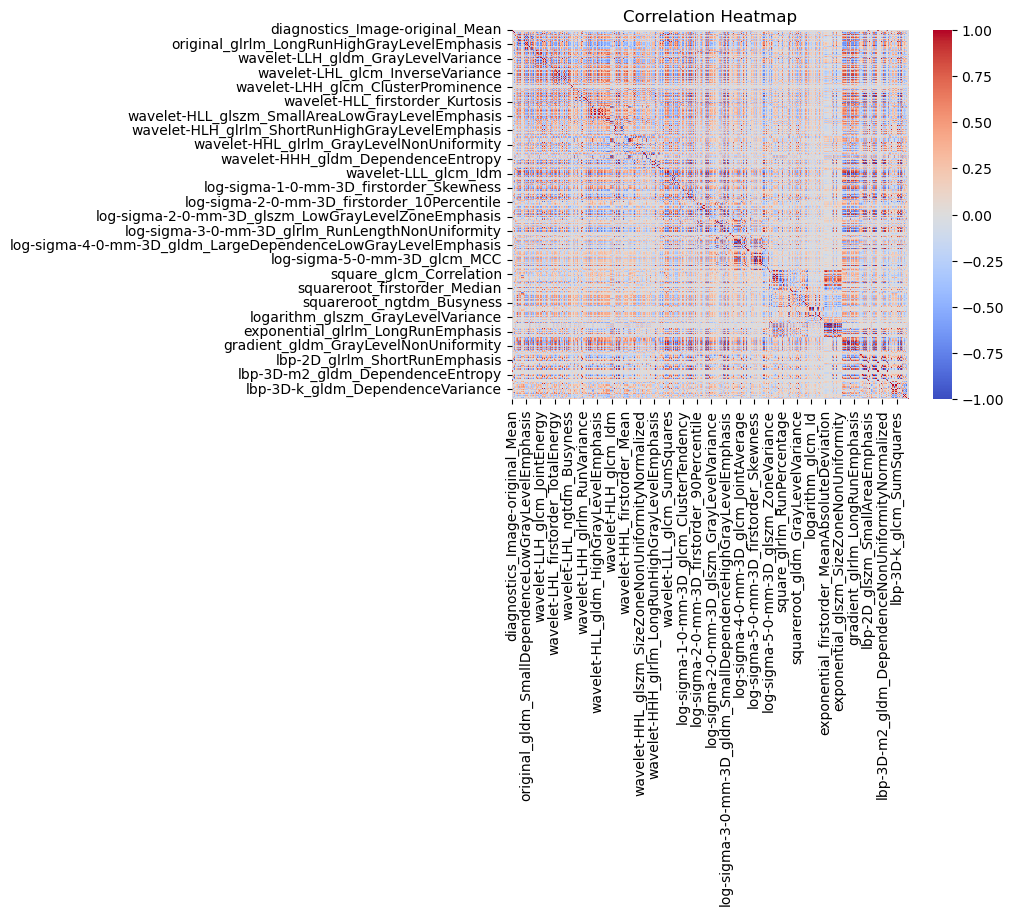

In [12]:
# Compute correlation matrix
control['Transition'] = label_encoder.fit_transform(control['Transition'])
corr_matrix = control.corr(numeric_only=True)

# Plot heatmap for features with high correlation with the target
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, center=0)
plt.title("Correlation Heatmap")
plt.show()

# PCA

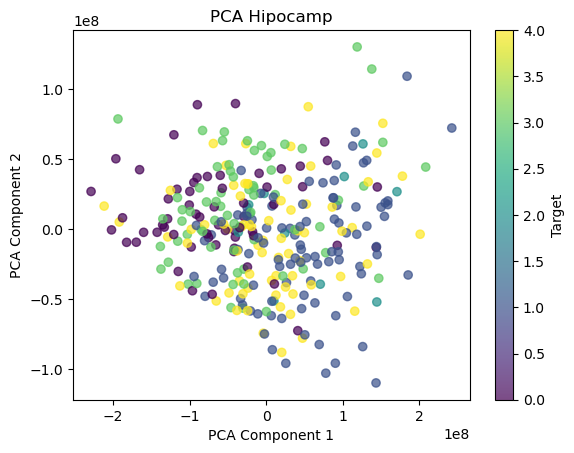

In [36]:

# Fit PCA
pca = PCA(n_components=4)
X_pca_train = pca.fit_transform(X_train)

# Plot PCA
plt.scatter(X_pca_train[:, 0], X_pca_train[:, 1], c=y_train_e, cmap='viridis', alpha=0.7)
plt.colorbar(label='Target')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Hipocamp')
plt.show()

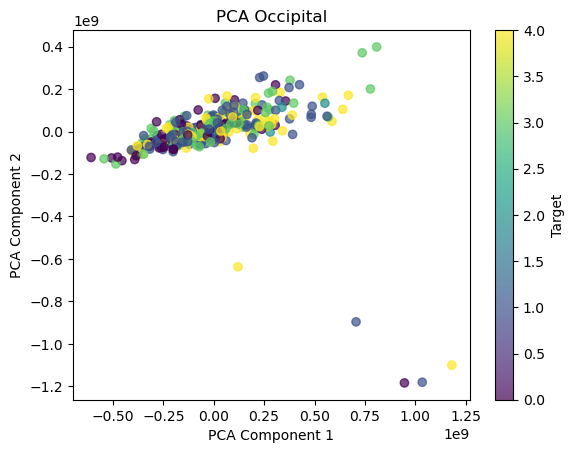

In [37]:
# Fit PCA
pca = PCA(n_components=4)
X_pca_control = pca.fit_transform(X_control)

# Plot PCA
plt.scatter(X_pca_control[:, 0], X_pca_control[:, 1], c=y_control_e, cmap='viridis', alpha=0.7)
plt.colorbar(label='Target')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Occipital')
plt.show()

# Corr com PCA

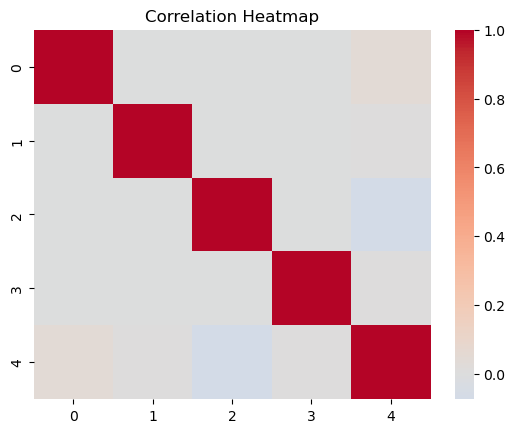

In [38]:
pca_train = pd.concat([ pd.DataFrame(X_pca_train), pd.Series(y_train_e, name = 'target')], axis=1,ignore_index=True)

# Compute correlation matrix

corr_matrix = pca_train.corr(numeric_only=True)

# Plot heatmap for features with high correlation with the target
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, center=0)
plt.title("Correlation Heatmap")
plt.show()

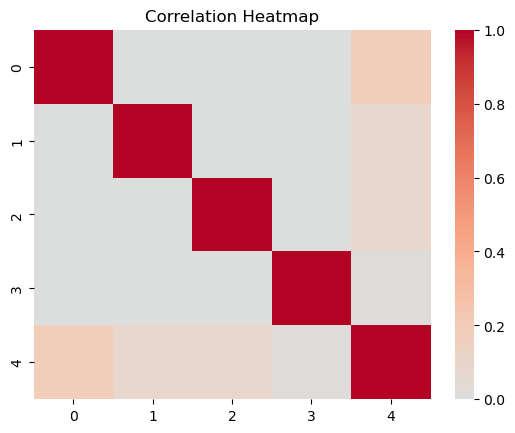

In [39]:
pca_control = pd.concat([ pd.DataFrame(X_pca_control), pd.Series(y_control_e, name = 'target')], axis=1,ignore_index=True)

# Compute correlation matrix

corr_matrix_c = pca_control.corr(numeric_only=True)

# Plot heatmap for features with high correlation with the target
sns.heatmap(corr_matrix_c, cmap="coolwarm", annot=False, center=0)
plt.title("Correlation Heatmap")
plt.show()

# Feature importance analysis TRAIN

In [51]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)

importances = pd.Series(model.feature_importances_, index=X_train.columns)
top_features = importances.nlargest(10)

# Visualize relationships for top features

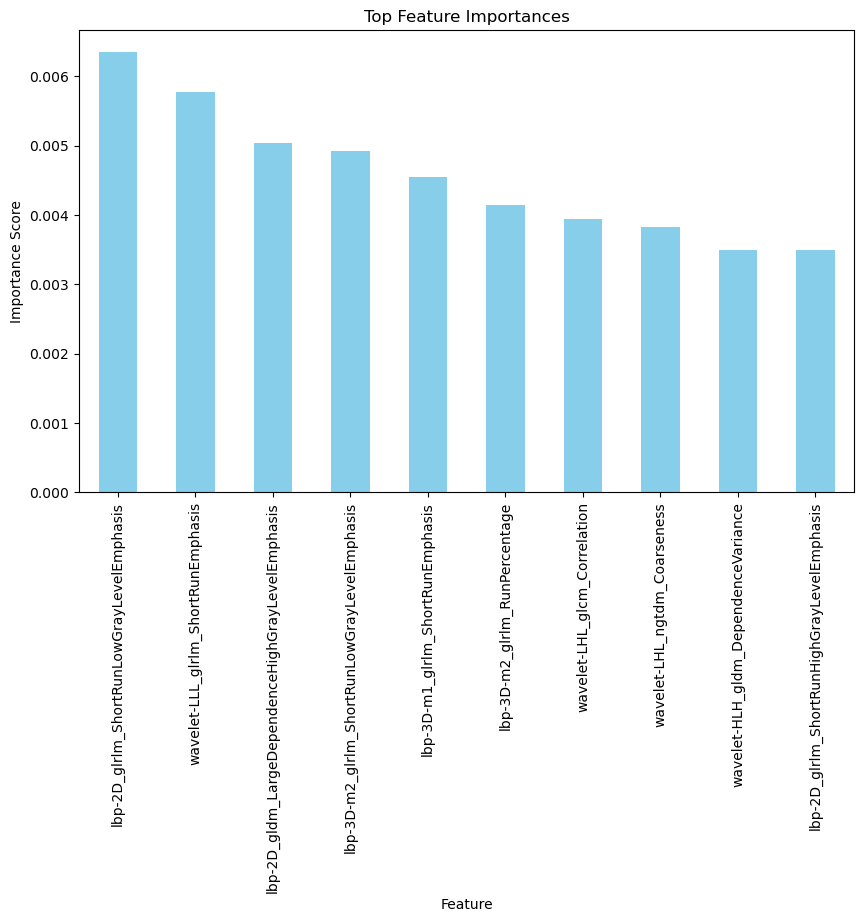

In [ ]:
plt.figure(figsize=(10, 6))
top_features.plot(kind='bar', color='skyblue')
plt.title("Top Feature Importances")
plt.ylabel("Importance Score Hipocamp")
plt.xlabel("Feature")
plt.show()

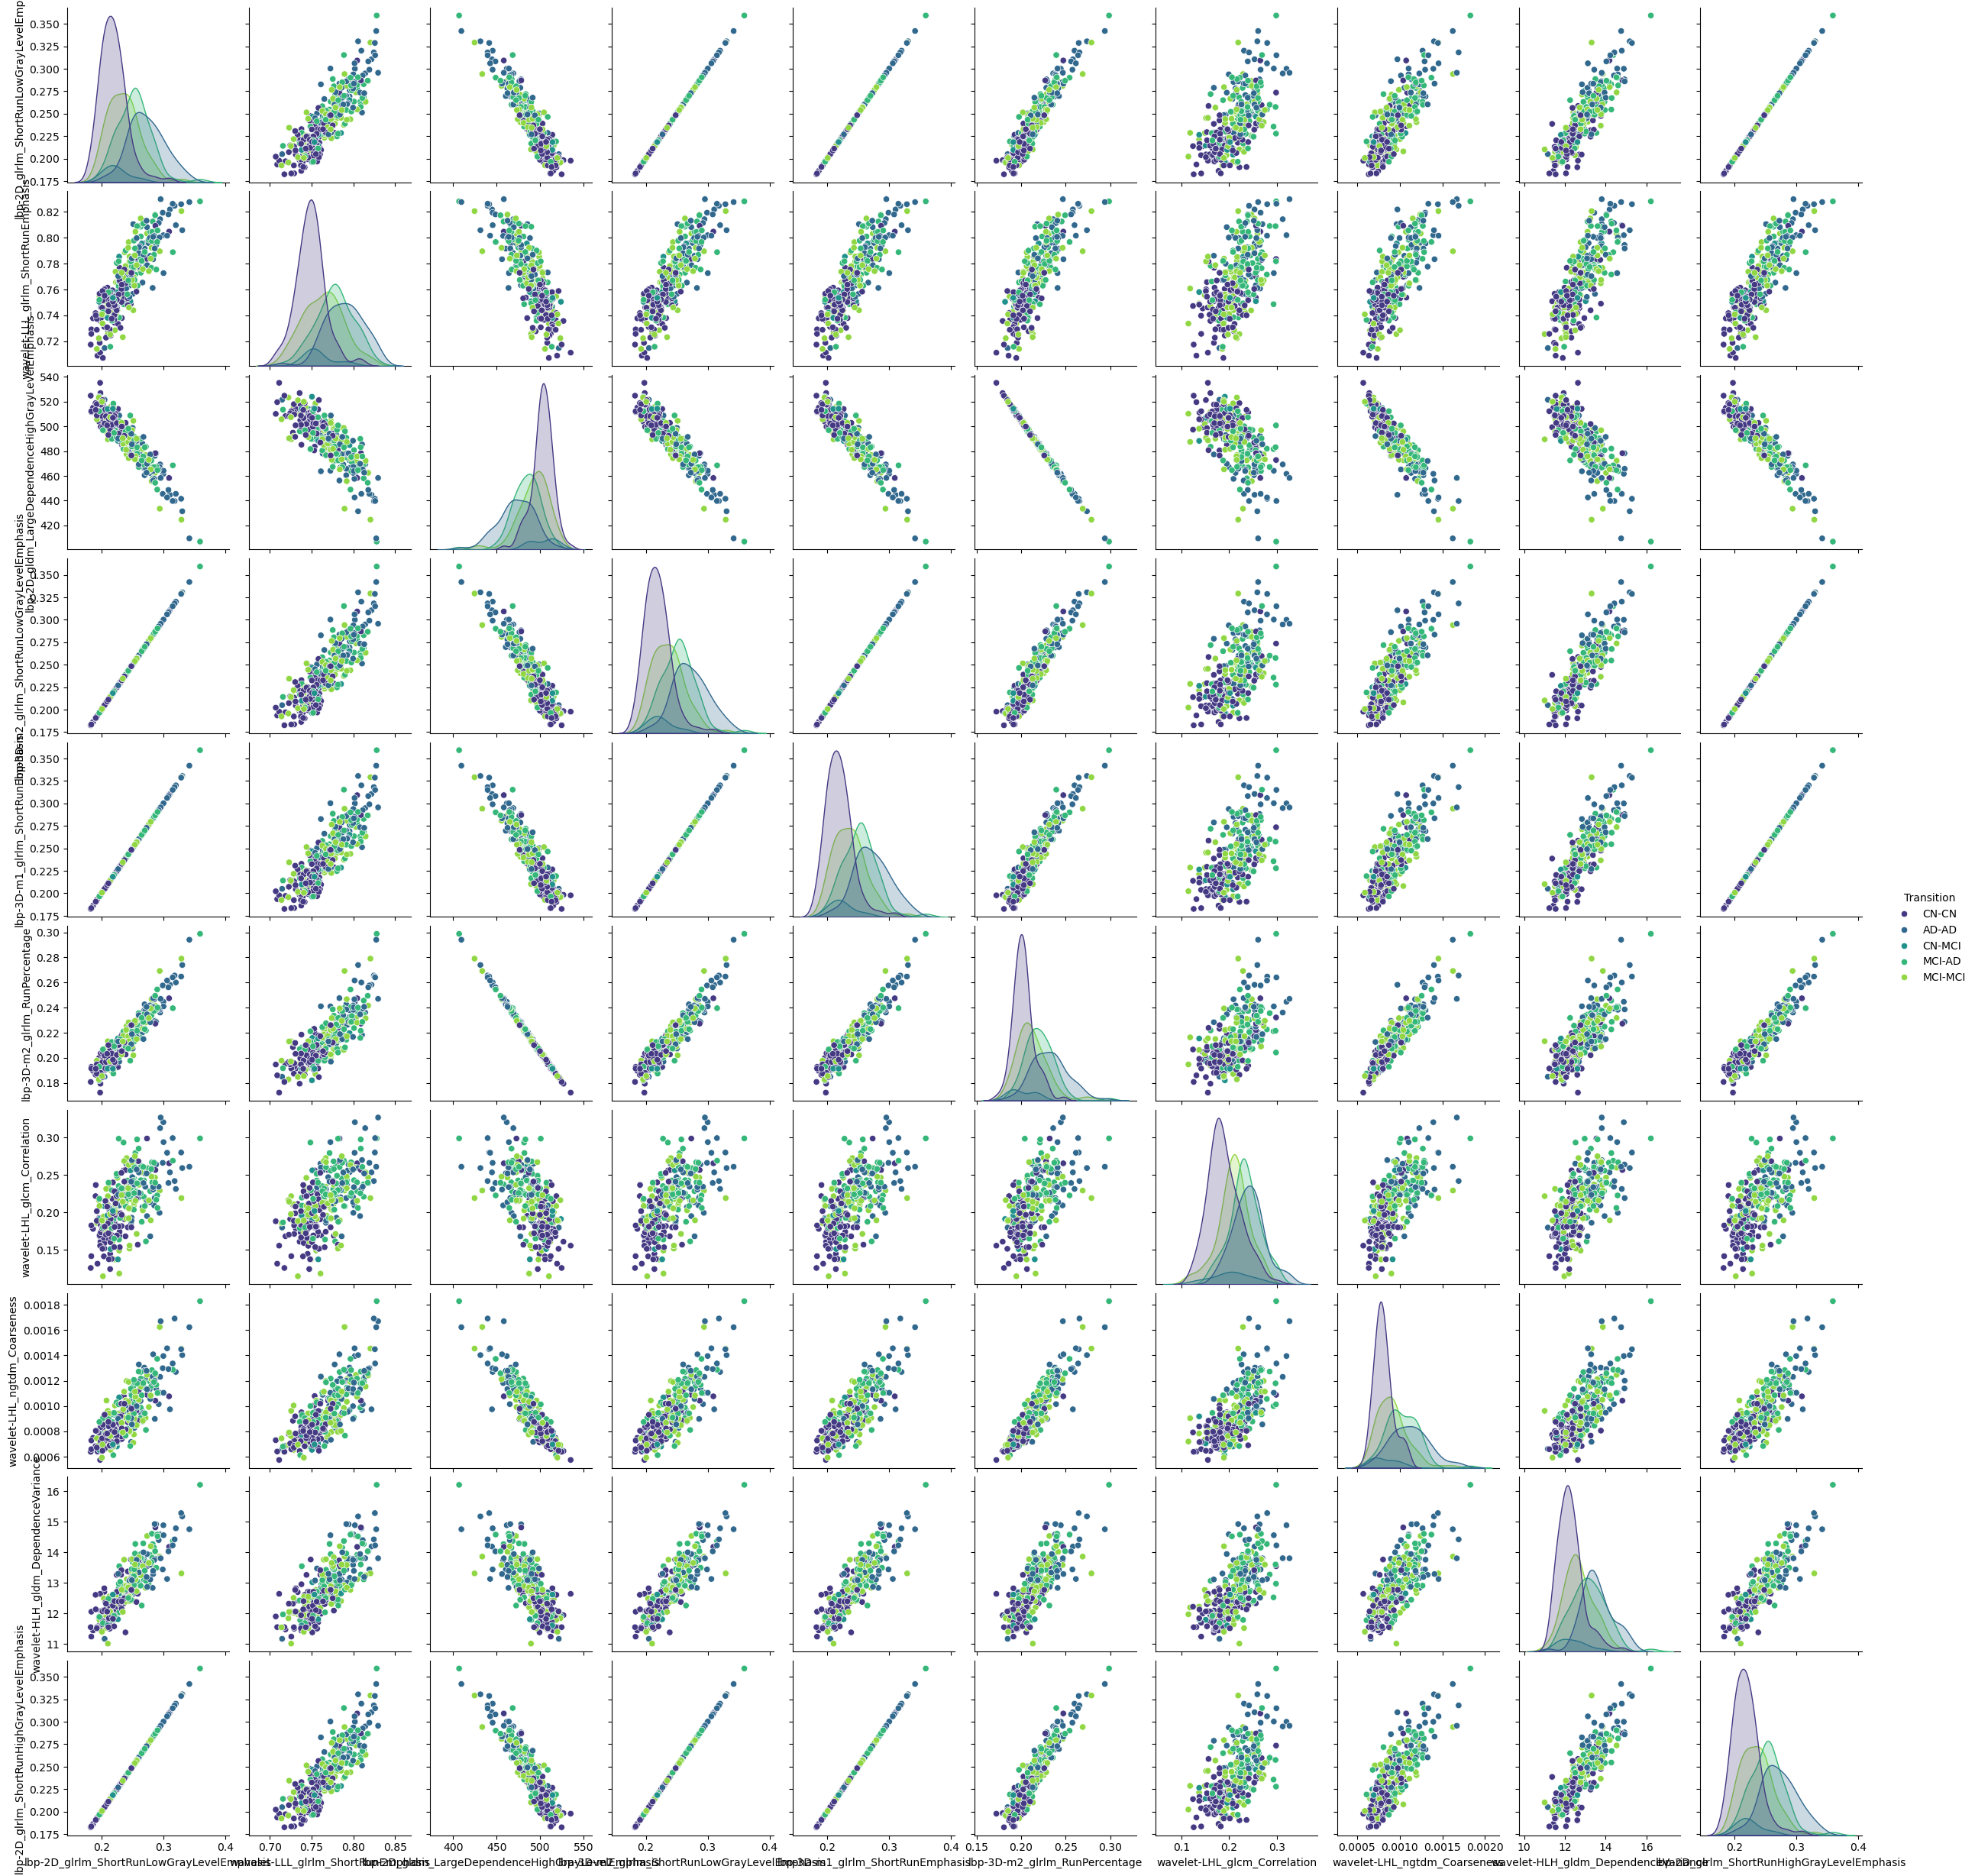

In [ ]:

sns.pairplot(hipo, vars=top_features.index, hue='Transition', palette='viridis')
plt.show()

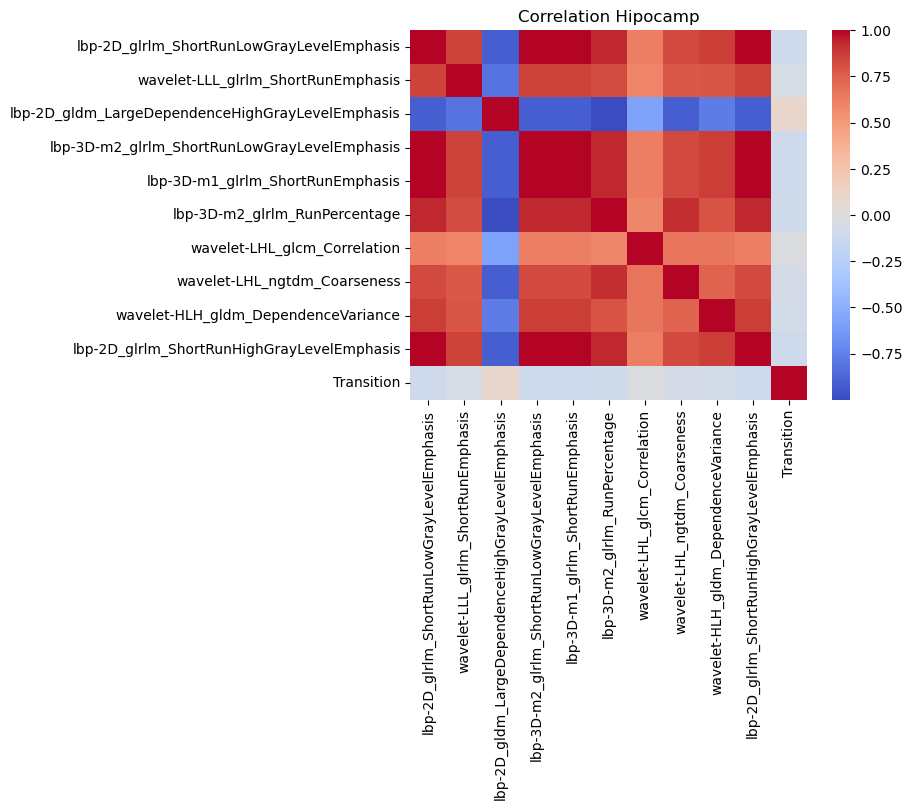

In [55]:
corr_train = pd.concat([ X_train[top_features.index], pd.Series(y_train_e, name='Transition') ], axis=1).corr(numeric_only=True)


# Plot heatmap for features with high correlation with the target
sns.heatmap(corr_train, cmap="coolwarm", annot=False, center=0)
plt.title("Correlation Hipocamp")
plt.show()

# Feature importance analysis Control

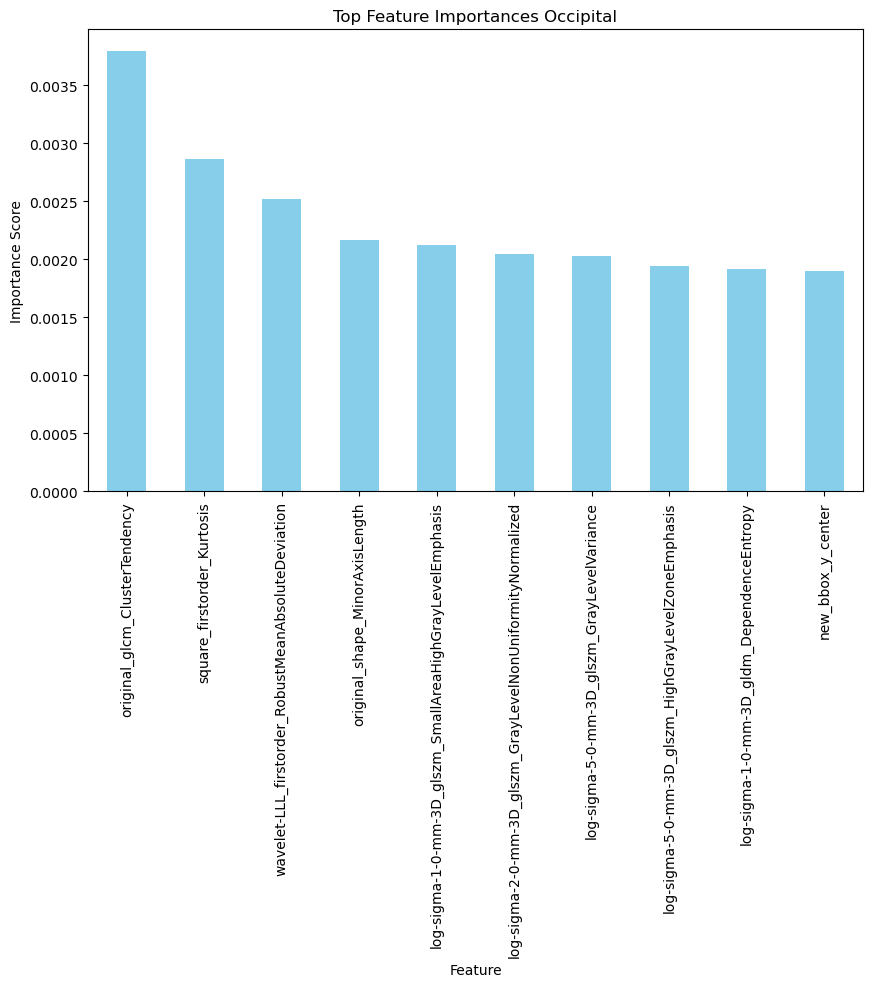

In [56]:

model = RandomForestClassifier(random_state=0)
model.fit(X_control, y_control)

importances = pd.Series(model.feature_importances_, index=X_control.columns)
top_features_c = importances.nlargest(10)

plt.figure(figsize=(10, 6))
top_features_c.plot(kind='bar', color='skyblue')
plt.title("Top Feature Importances Occipital")
plt.ylabel("Importance Score")
plt.xlabel("Feature")
plt.show()

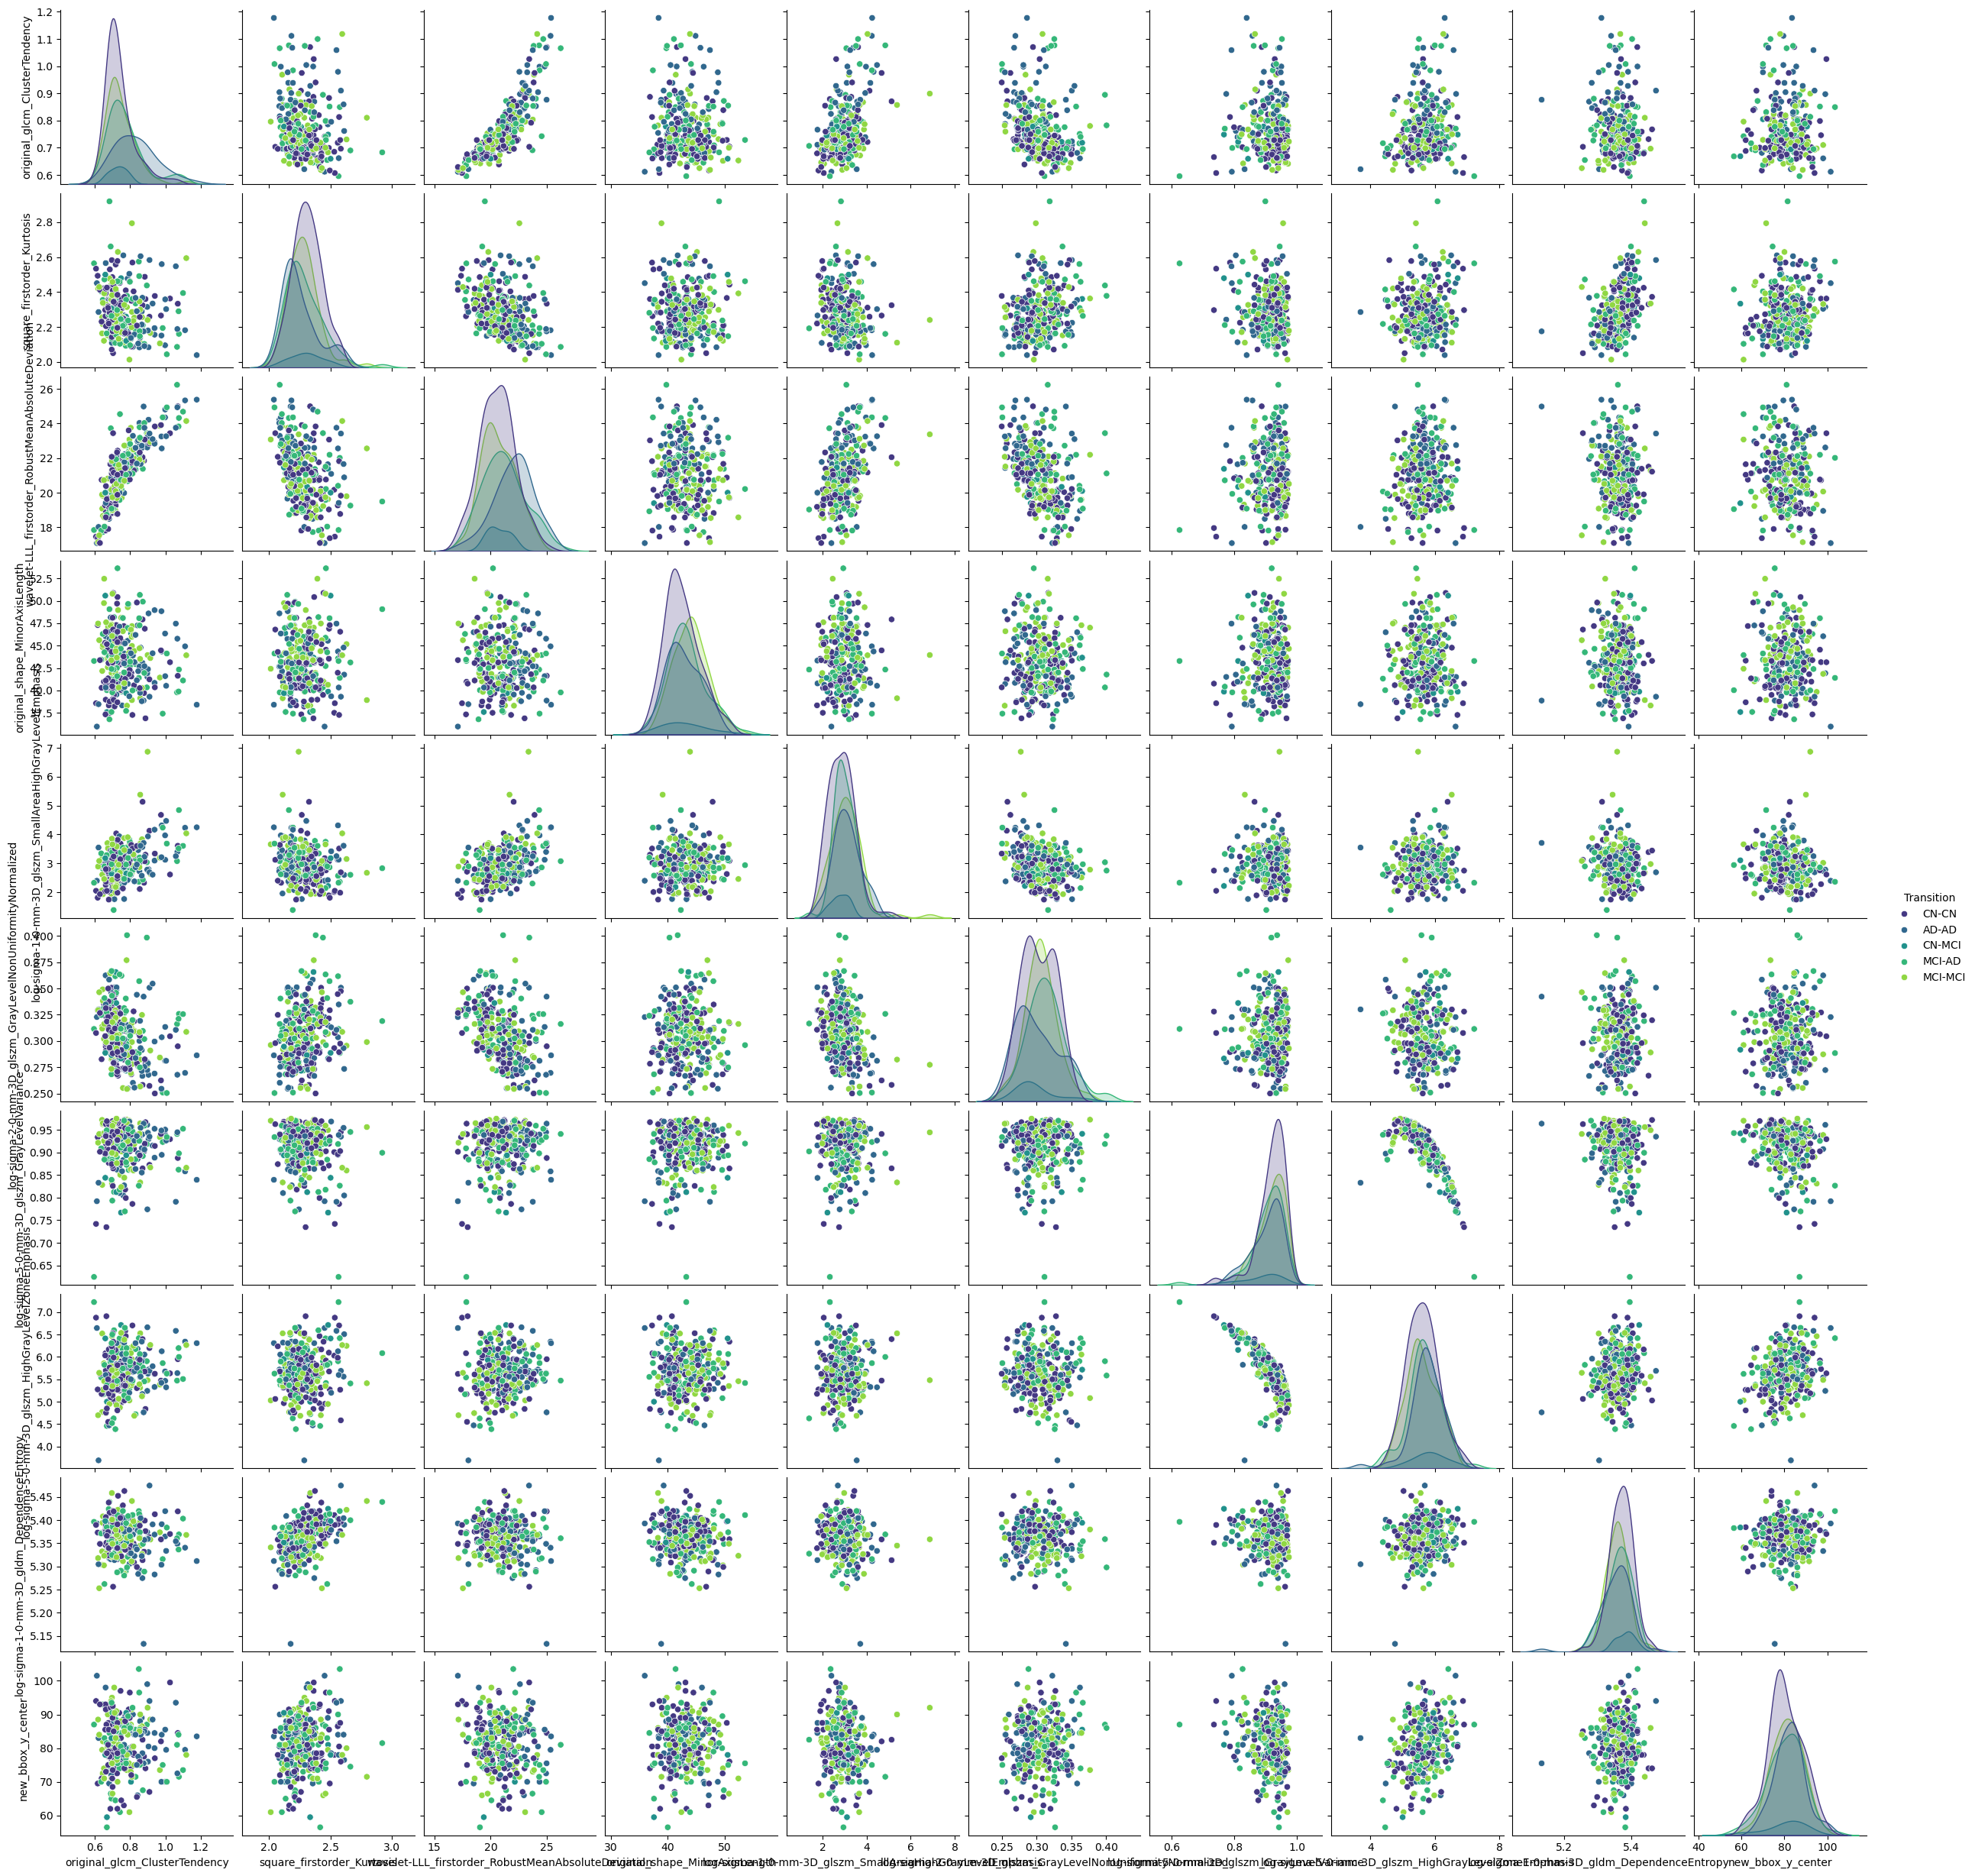

In [57]:

sns.pairplot(control, vars=top_features_c.index, hue='Transition', palette='viridis')
plt.show()

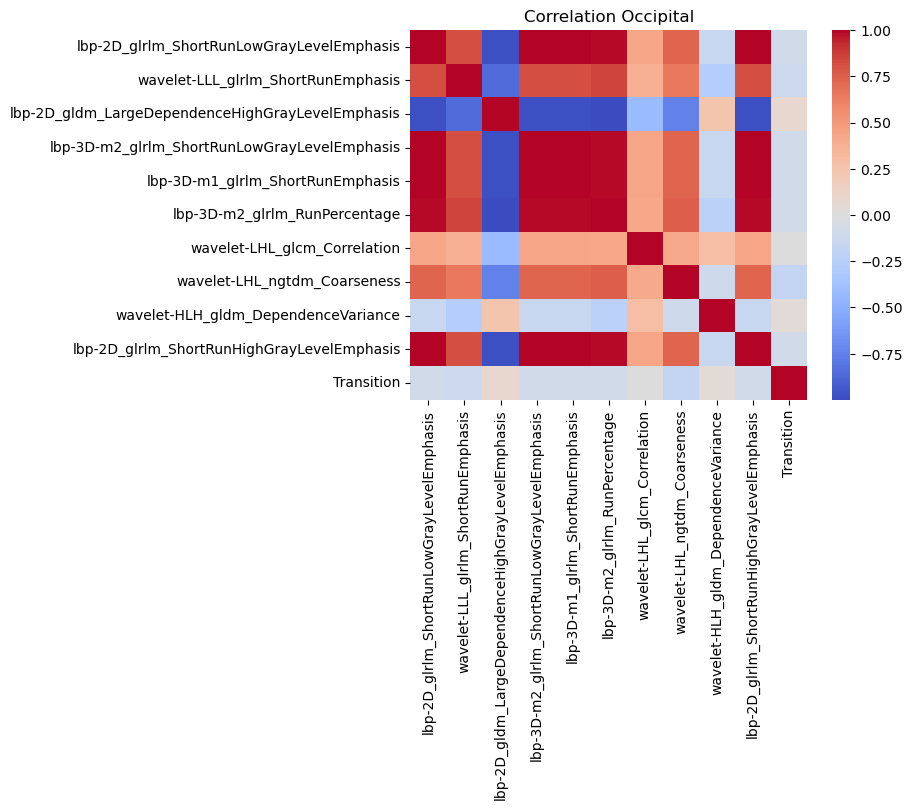

In [58]:
corr_control = pd.concat([ X_control[top_features.index], pd.Series(y_control_e, name='Transition') ], axis=1).corr(numeric_only=True)

# Plot heatmap for features with high correlation with the target
sns.heatmap(corr_control, cmap="coolwarm", annot=False, center=0)
plt.title("Correlation Occipital")
plt.show()